<a href="https://colab.research.google.com/github/MoeinDSP/Numerical-Analysis-for-Machine-Learning/blob/main/image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = '../TarantulaNebula.jpg'

A = imread(image_path)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

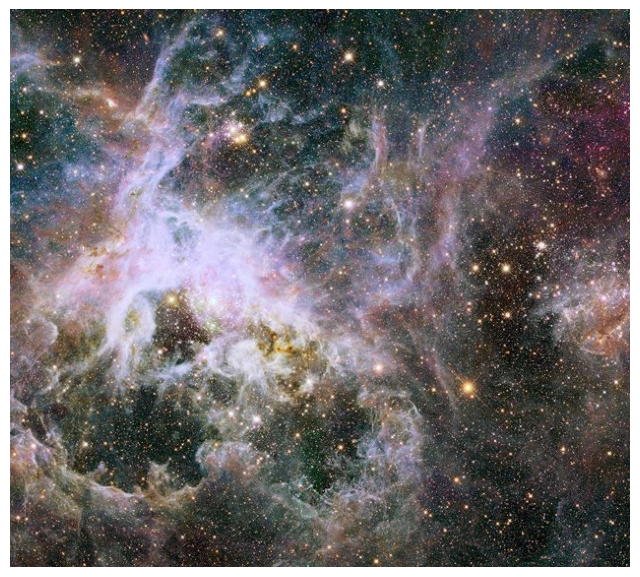

In [ ]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

In [ ]:
X = np.mean(A, axis=2)

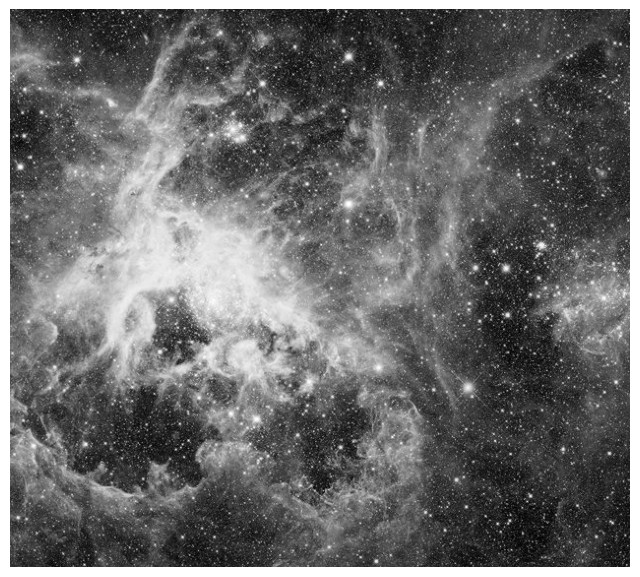

In [ ]:
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray')
plt.show()

What is the picture size?

In [ ]:
X.shape

(567, 630)

Perform the SVD decomposition

In [ ]:
U, s, VT = np.linalg.svd(X, full_matrices = False)

U.shape, s.shape, VT.shape

((567, 567), (567,), (567, 630))

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

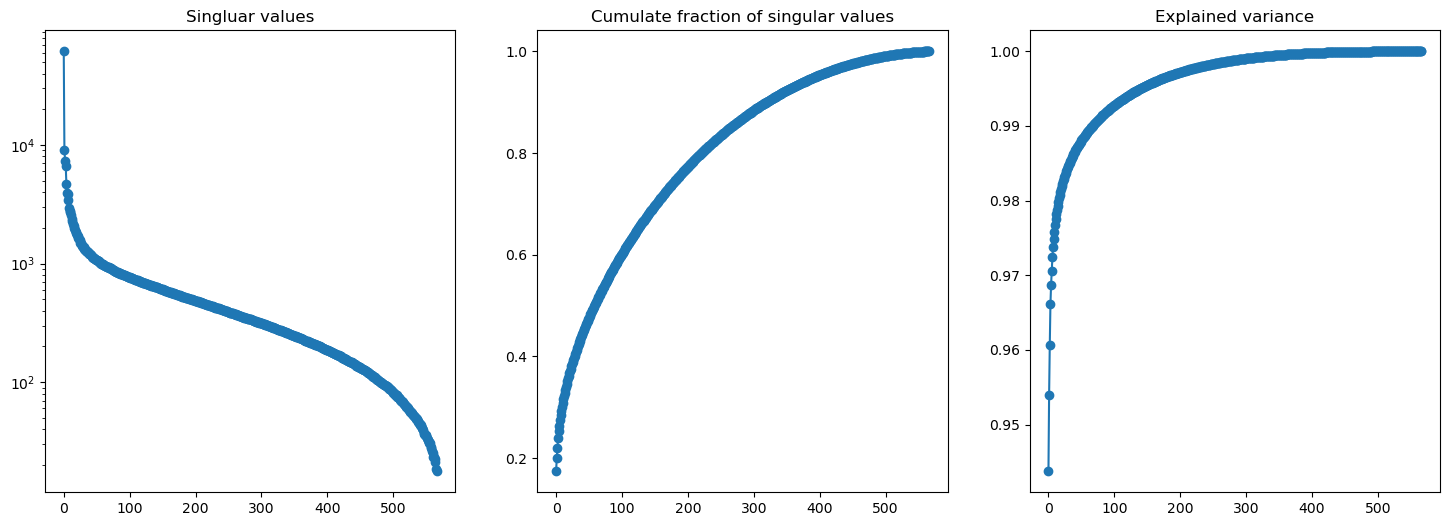

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[2].set_title('Explained variance')

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

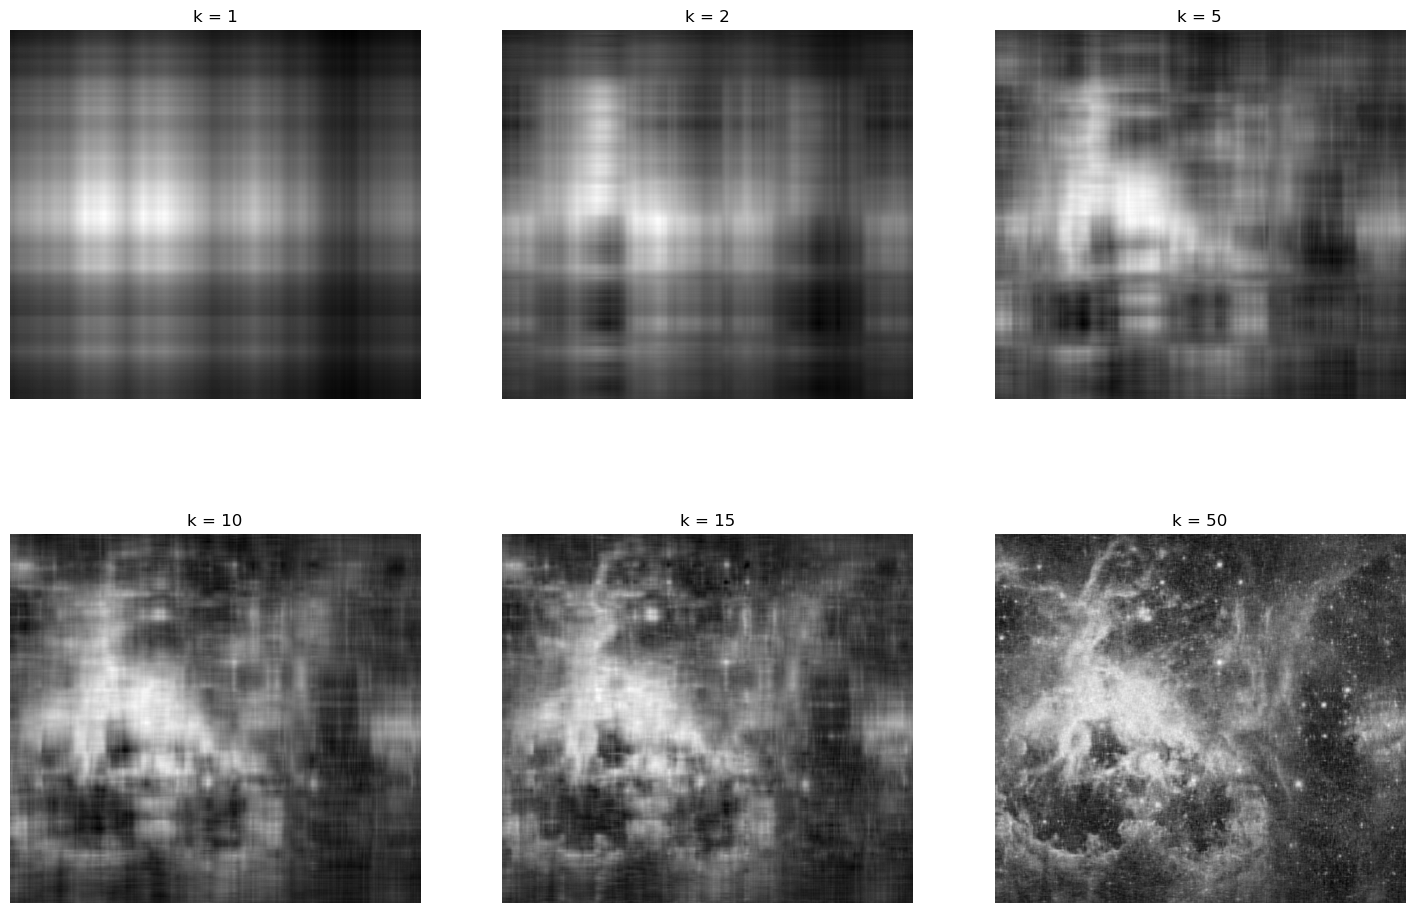

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
  k = idxs[i]
  X_k = np.matmul(U[:,:k], np.matmul(np.diag(s[:k]),VT[:k,:]))
  axs[i].imshow(X_k, cmap='gray')
  axs[i].set_title(f'k = {k}')
  axs[i].axis('off')


Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

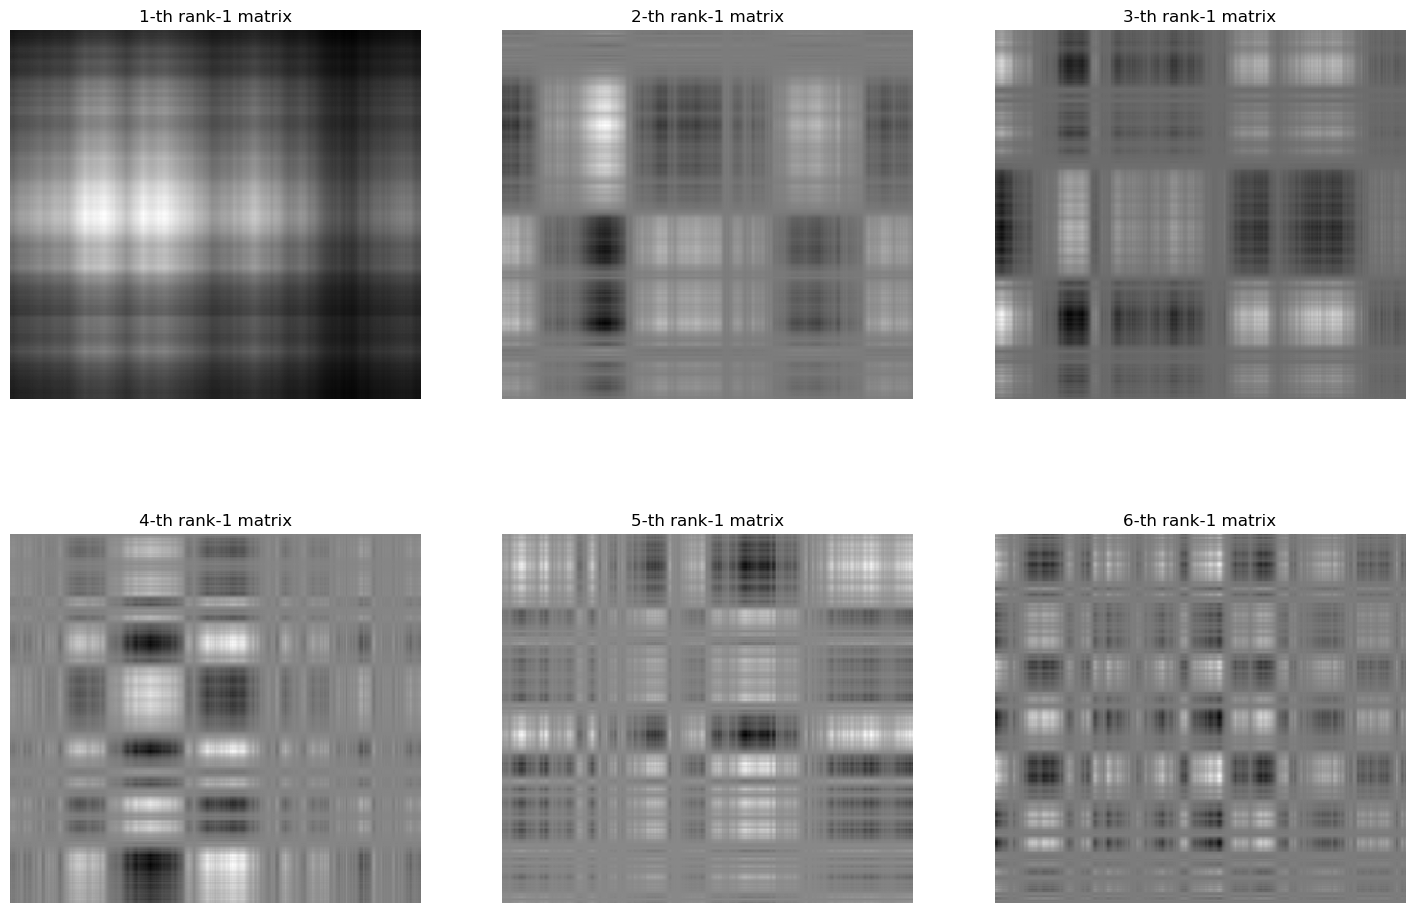

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1,2,3,4,5,6]
for i in range(len(idxs)):
  k = idxs[i]
  ukvk = np.outer(U[:,k - 1], VT[k - 1,:])
  axs[i].imshow(ukvk, cmap="gray")
  axs[i].set_title(f'{k}-th rank-1 matrix')
  axs[i].axis('off')
